## 1. Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
#create file path
path = r'C:\Users\krist\ATX Metro Bike'

In [3]:
#import dataset
metrobikes = pd.read_pickle(os.path.join(path, 
                                         '02.Data', 
                                         'PreparedData', 
                                         'metrobikes_cleaned.pkl'))
metrobikes.head()

,Trip ID,Membership Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Trip Time mins,Month,Year,Checkout Name Current,Checkout Kiosk ID current,Checkout Kiosk Status,Checkout Kiosk Geographic Location,Checkout Kiosk Dock Count,Return Name Current,Return Kiosk ID current,Return Kiosk Status,Return Kiosk Geographic Location,Return Kiosk Dock Count
0,16459203,Local365,37,classic,2017-12-01 09:51:41,2017-12-01,09:51:41,3,12,2017,8th & Congress,2496.0,active,"(30.2698, -97.74186)",14.0,4th & Congress,2495.0,active,"(30.26634, -97.74378)",15.0
1,4106422,Local365,971,classic,2015-03-13 16:20:24,2015-03-13,16:20:24,14,3,2015,4th & Congress,2495.0,active,"(30.26634, -97.74378)",15.0,4th & Congress,2495.0,active,"(30.26634, -97.74378)",15.0
2,3454605,Local365,29,classic,2014-10-14 08:33:54,2014-10-14,08:33:54,22,10,2014,Toomey Rd @ South Lamar,2712.0,closed,"(30.26304, -97.75824)",0.0,Riverside @ S. Lamar,2575.0,active,"(30.26446, -97.75665)",15.0
3,3454592,Local365,646,classic,2014-10-14 08:32:03,2014-10-14,08:32:03,29,10,2014,3rd & West,2552.0,active,"(30.2678, -97.75189)",13.0,8th & Congress,2496.0,active,"(30.2698, -97.74186)",14.0
4,4106421,24 Hour Walk Up Pass,124,classic,2015-03-13 16:20:15,2015-03-13,16:20:15,10,3,2015,Dean Keeton & Speedway,3794.0,active,"(30.28953, -97.73695)",19.0,Long Center @ South 1st & Riverside,2549.0,active,"(30.25941, -97.74971)",13.0


In [4]:
#check shape
metrobikes.shape

(1844301, 20)

## 2. Check correlations between variables

In [5]:
#create list with columns of interest
corr_cols = ['Trip Time mins', 'Month', 'Year']

In [6]:
#investigate correlations
metrobikes[corr_cols].corr(method = 'pearson')

,Trip Time mins,Month,Year
Trip Time mins,1.000000,-0.02058,-0.058098
Month,-0.020580,1.00000,-0.038360
Year,-0.058098,-0.03836,1.000000


### all correlations are very weak

## 3. Check distributions

In [7]:
#make subset with trip ID and checkout datetime
trip_subset = metrobikes[['Trip ID', 'Checkout Datetime']]
trip_subset.shape

(1844301, 2)

### Trips by hour

<Axes: title={'center': 'MetroBike Trips by Hour'}, xlabel='Hour of Day'>

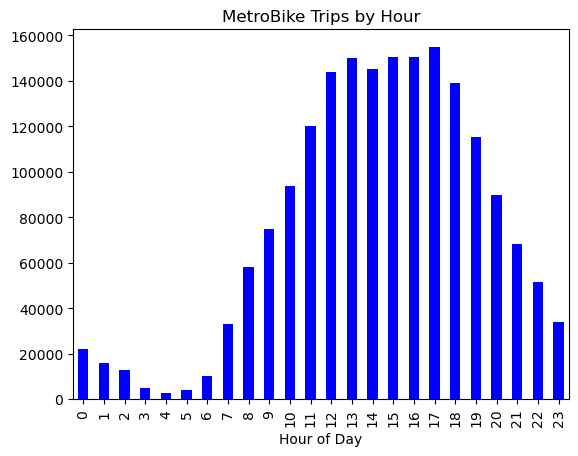

In [19]:
trip_subset.groupby([trip_subset['Checkout Datetime'].dt.hour]).count().plot(kind='bar', 
                                                                           legend = False, 
                                                                           xlabel = 'Hour of Day',
                                                                            color = 'blue',
                                                                            title = 'MetroBike Trips by Hour')

### Trips by day of week (0=Monday 6=Sunday)

<Axes: title={'center': 'MetroBike Trips by Day of Week'}, xlabel='Day of Week'>

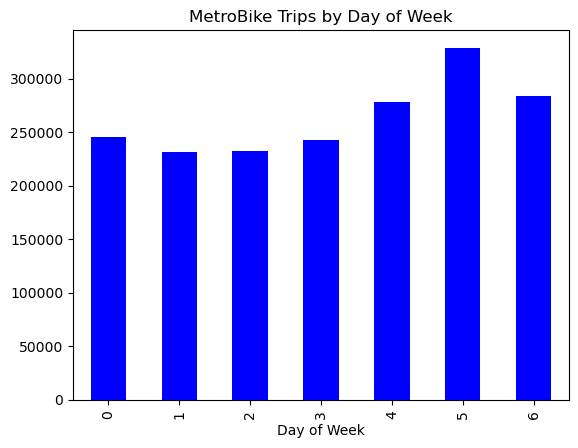

In [20]:
#check distribution of days of the week 0 = Monday 6 = Sunday
trip_subset.groupby([trip_subset['Checkout Datetime'].dt.weekday]).count().plot(kind='bar', 
                                                                                 legend = False,
                                                                                xlabel = 'Day of Week',
                                                                                color = 'blue',
                                                                                title = 'MetroBike Trips by Day of Week')

### Trips by Month

<Axes: title={'center': 'MetroBike Trips by Month'}, xlabel='Month'>

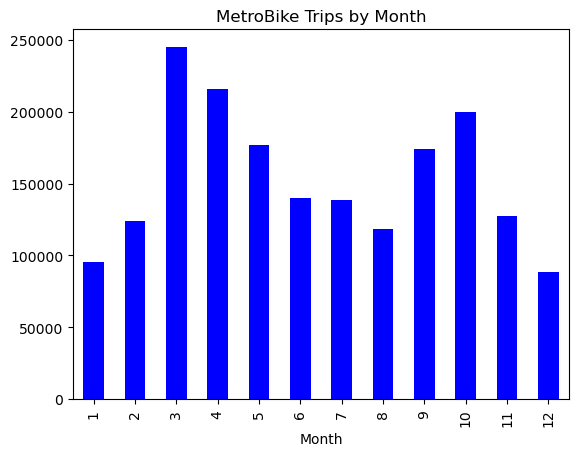

In [21]:
trip_subset.groupby([trip_subset['Checkout Datetime'].dt.month]).count().plot(kind='bar', 
                                                                                 legend = False,
                                                                                xlabel = 'Month',
                                                                                color = 'blue',
                                                                                title = 'MetroBike Trips by Month')

### Trips by year

<Axes: title={'center': 'MetroBike Trips by Year'}, xlabel='Year'>

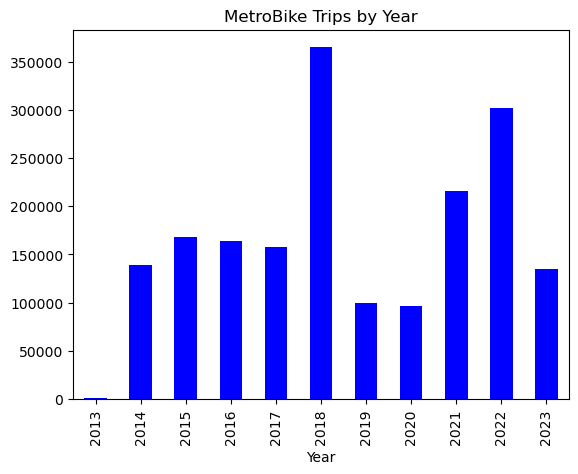

In [22]:
trip_subset.groupby([trip_subset['Checkout Datetime'].dt.year]).count().plot(kind='bar', 
                                                                                 legend = False,
                                                                                xlabel = 'Year',
                                                                                color = 'blue',
                                                                                title = 'MetroBike Trips by Year')

In [26]:
metrobikes.groupby('Month').agg({'Trip Time mins': ['mean']})

,Trip Time mins
,mean
Month,
1,24.057053
2,22.660457
3,23.081985
4,23.130320
5,25.754709
6,25.639354
7,25.417591
8,22.954054


In [27]:
metrobikes.groupby('Year').agg({'Trip Time mins': ['mean']})

,Trip Time mins
,mean
Year,
2013,37.513820
2014,26.610912
2015,24.094557
2016,26.938170
2017,29.974430
2018,18.301139
2019,23.478914
2020,32.311746


In [28]:
#check average trip time by day of week
metrobikes.groupby([metrobikes['Checkout Datetime'].dt.weekday]).agg({'Trip Time mins': ['mean']})

,Trip Time mins
,mean
Checkout Datetime,
0,20.711613
1,18.835905
2,18.652153
3,19.644400
4,22.913861
5,29.606572
6,28.506139


<Axes: title={'center': 'Average Trip Time by Hour'}, xlabel='Hour', ylabel='Minutes'>

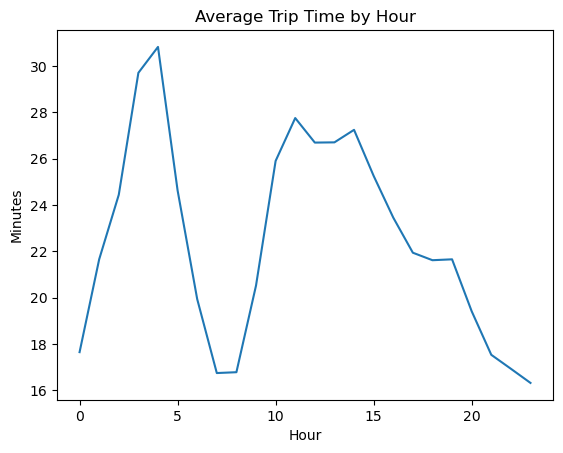

In [35]:
#check average trip time by hour of teh day
metrobikes.groupby([metrobikes['Checkout Datetime'].dt.hour]).agg({'Trip Time mins': ['mean']}).plot(kind = 'line',
                                                                                                     legend = False,
                                                                                                    xlabel = 'Hour',
                                                                                                    ylabel = 'Minutes',
                                                                                                    title = 'Average Trip Time by Hour')